In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


# In this notebook we will be studying the data set to analyse the sales and income with respect to different factors like time, days and gender.

# Importing libraries and dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_palette('Accent')

data = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# First look into the data
**We will perform the following tasks**
* Check columns, rows, database size and data types
* Look for null/empty values
* Remove or impute these values
* Look for duplicate values
* Remove or group to accomodate duplicate values


In [3]:
#Looking at rows and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
#Looking at shape of dataframe
data.shape

(1000, 17)

In [5]:
#Getting a closer look at columns
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
#Getting statistical data of numeric columns
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
#Finding if the frame has null values
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
#Looking for duplicated values
data.duplicated().sum()

0

**As of now we found zero duplicated values and zero null values**

## Making changes to the data base, here we will perform following tasks
* Remove unwanted columns
* Add desired columns
* Change data types of columns according to our plan
* Rename and change columns according to our need

In [9]:
#Fixing data types,renaming existing columns, removing unwanted columns, adding new columns and defining a function to create new category column.
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data = data.drop('gross margin percentage' , axis = 1)
data = data.rename(columns = {"Payment" : "payment_method" , "cogs" : "cost" ,"Product line":"product_category"})
data['Time'] = data['Time'].astype(str)
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
data['Time'] = data['Time'].dt.strftime('%H:%M')
def categorize_time(hour):
    if 10 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 18:
        return 'Evening'
    else:
        return 'Night'
data['Time category'] = data['Hour'].apply(categorize_time)

/tmp/ipykernel_17/3804415046.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


The code below shows Time column has been dropped along with the renaming of columns.

# Data analysis

Since our data is now cleaned and we have gotten surface knowledge of summary statistics, we will proceed to analyse income and sales with respect to days, time of day and gender.

## Analysing in tabular form 

In [10]:
#Analyzing top 5 days with most amount of product sales.
quantity_day = data.groupby('Date')['Quantity'].sum()
print("Top 10 days with most products sold")
print(quantity_day.sort_values(ascending=False).head(5))

Top 10 days with most products sold
Date
2019-02-07    128
2019-03-14    117
2019-02-15    106
2019-03-05    103
2019-03-09     99
Name: Quantity, dtype: int64


In [11]:
#Looking at the most profitable days
sales_day = data.groupby('Date')['gross income'].sum()
print("Top 5 most profitable days")
print(sales_day.sort_values(ascending = False).head(5))

Top 5 most profitable days
Date
2019-03-09    355.9070
2019-02-07    344.2005
2019-03-14    343.5540
2019-02-15    325.2755
2019-03-02    312.3955
Name: gross income, dtype: float64


In [12]:
#Finding top rated product categories.
prod_rating = data.groupby('product_category')['Rating'].mean().reset_index()
print("Top rated product categories")
print(prod_rating.sort_values("Rating",ascending = False))

Top rated product categories
         product_category    Rating
2      Food and beverages  7.113218
1     Fashion accessories  7.029213
3       Health and beauty  7.003289
0  Electronic accessories  6.924706
5       Sports and travel  6.916265
4      Home and lifestyle  6.837500


In [13]:
#Finding orders placed and gross income in different parts of day, while going deeper to look at most busy hours in supermarket where most orders are placed
ppl_time = data.groupby(['Time category', 'Gender']).agg(count=('Invoice ID', 'count')).reset_index()
income_time = data.groupby('Time category')['gross income'].sum().reset_index()
order_hours = data.groupby('Hour')['Invoice ID'].count().reset_index()

print(ppl_time) 
print("\n")
print(income_time.sort_values('gross income',ascending = False).head(5))
print("\n")
print(order_hours.sort_values('Invoice ID',ascending = False).head(5))

  Time category  Gender  count
0     Afternoon  Female    188
1     Afternoon    Male    189
2       Evening  Female     74
3       Evening    Male     77
4       Morning  Female    109
5       Morning    Male     82
6         Night  Female    130
7         Night    Male    151


  Time category  gross income
0     Afternoon     5847.4770
3         Night     4223.7800
2       Morning     2942.8005
1       Evening     2365.3115


   Hour  Invoice ID
9    19         113
3    13         103
5    15         102
0    10         101
8    18          93


## Visualizations

**Since we have seen the data in text and number it is better to further analyse it in visual form.**

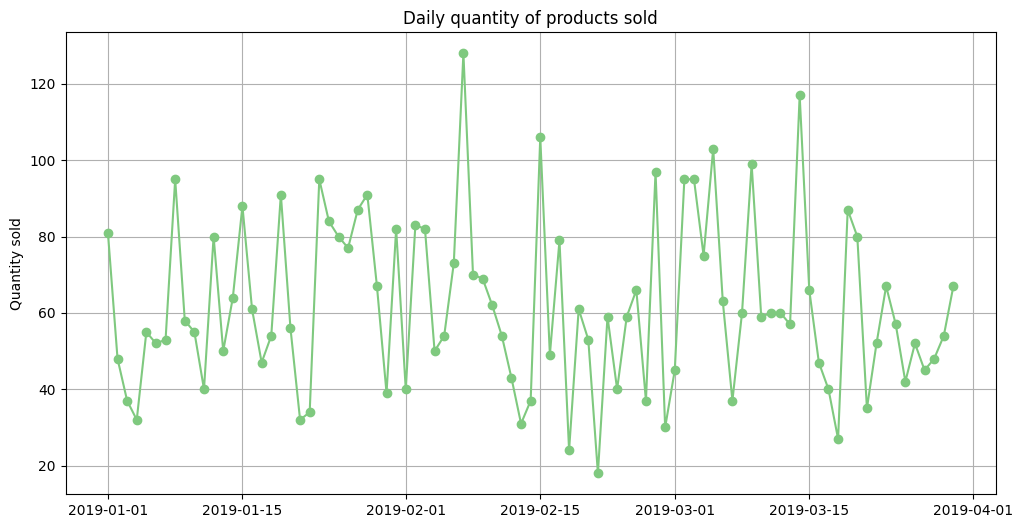

In [14]:
#Looking at quantites of products sold everyday
plt.figure(figsize = (12,6))
plt.plot(quantity_day.index ,quantity_day.values , marker = 'o' )
plt.title("Daily quantity of products sold")
plt.ylabel("Quantity sold")
plt.grid(True)
plt.show()

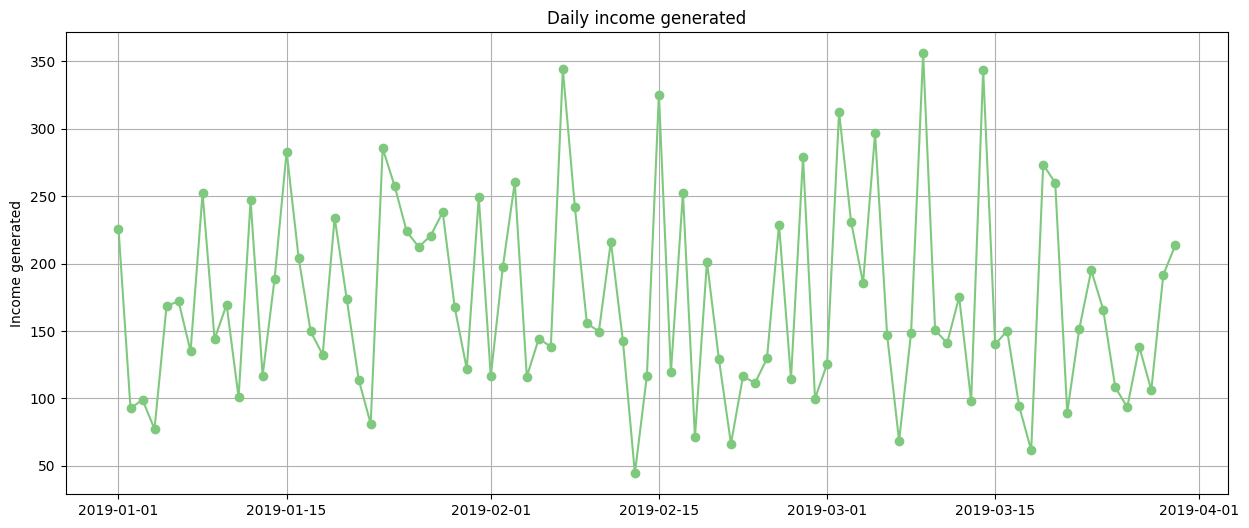

In [15]:
#Looking at gross income generated everyday
plt.figure(figsize = (15,6))
plt.plot(sales_day.index ,sales_day.values , marker = 'o' )
plt.title("Daily income generated")
plt.ylabel("Income generated")
plt.grid(True)
plt.show()

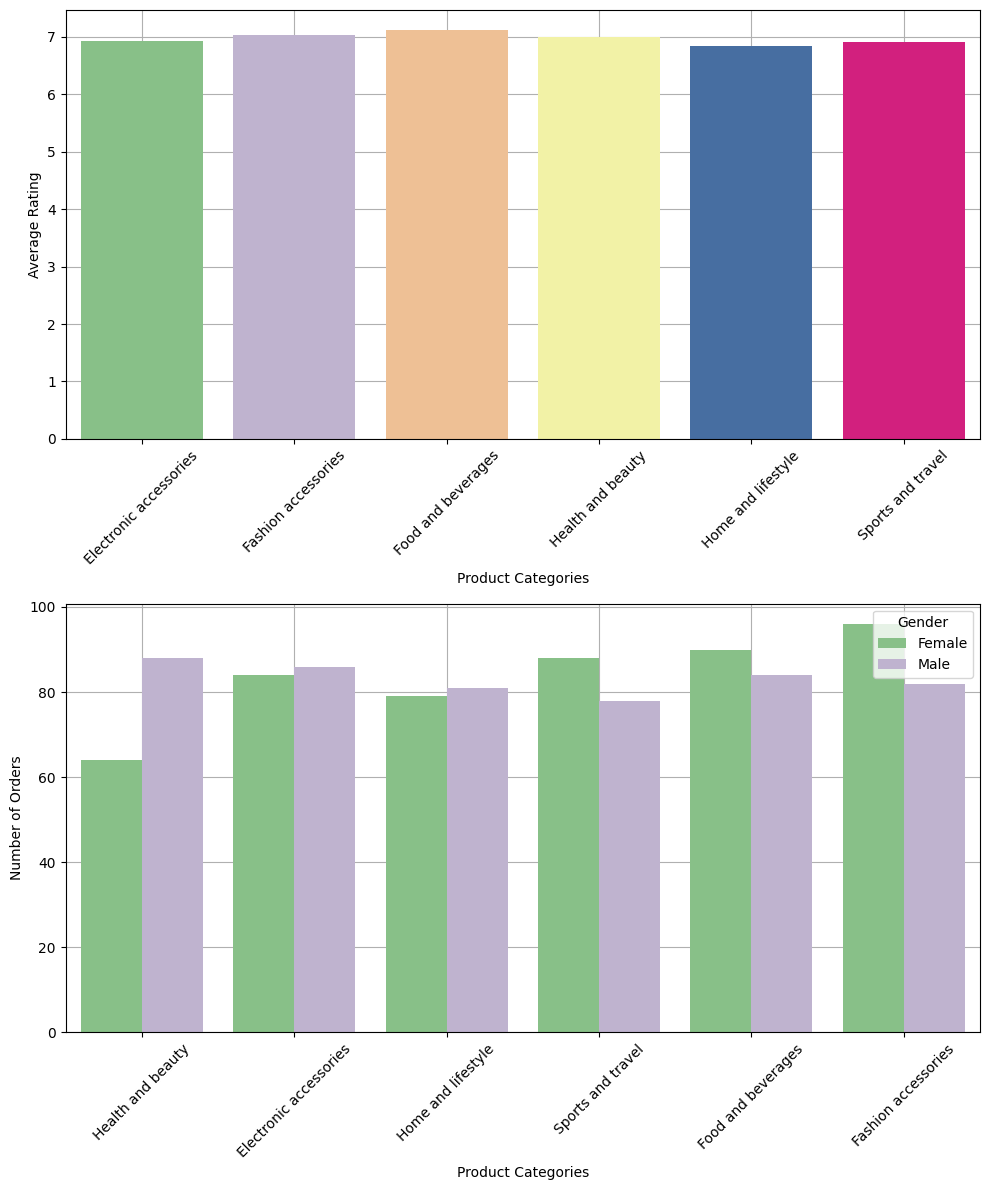

In [16]:
#Looking at highest rated product lines
plt.figure(figsize = (10,12))
plt.subplot(2,1,1)
sns.barplot(data = prod_rating , x = 'product_category' ,y = 'Rating', zorder =2 )
plt.xlabel("Product Categories")
plt.ylabel("Average Rating")
plt.grid(True,zorder = 1)
plt.xticks(rotation = 45)

#Visualizing number of orders in each category for each gender
plt.subplot(2,1,2)
sns.countplot(data = data, x = 'product_category', hue = 'Gender',zorder =2 )
plt.xlabel("Product Categories")
plt.ylabel("Number of Orders")
plt.grid(True,zorder = 1)
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


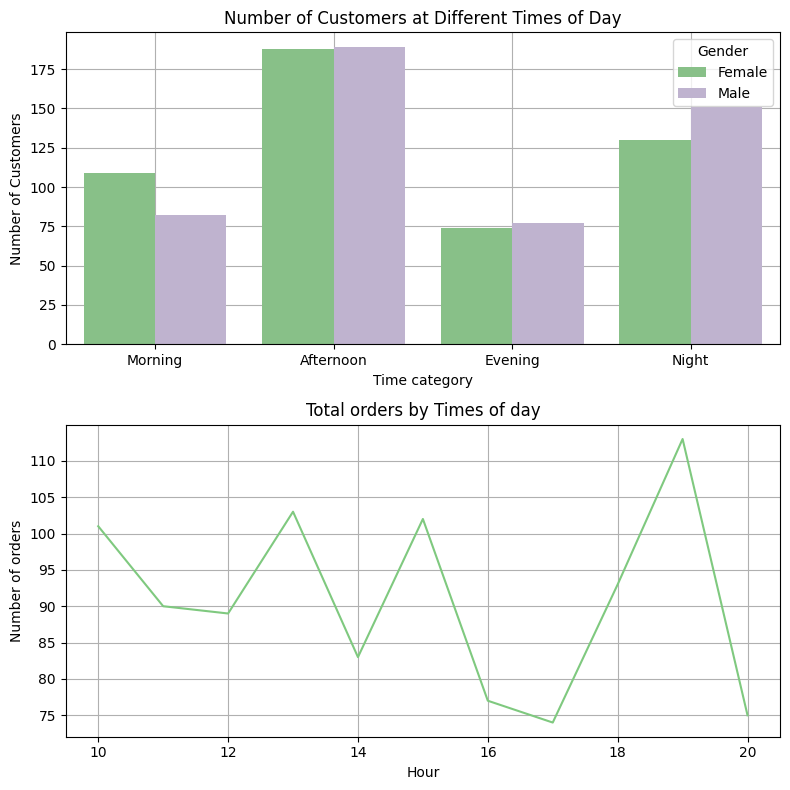

In [17]:
#Looking at orders made during each part of day along with the orders in every hour summed up for the duration of dataset.
plt.figure(figsize=(8, 8))  


plt.subplot(2, 1, 1)
sns.barplot(data=ppl_time, x='Time category', y='count', hue='Gender',order = ['Morning', 'Afternoon', 'Evening', 'Night'], zorder=2)
plt.title("Number of Customers at Different Times of Day")
plt.grid(True, zorder=1)
plt.ylabel("Number of Customers")

plt.subplot(2, 1, 2)
sns.lineplot(data=order_hours, x='Hour', y='Invoice ID', zorder=2)
plt.title("Total orders by Times of day")
plt.grid(True, zorder=1)
plt.ylabel("Number of orders")

plt.tight_layout()
plt.show()

Data has been categorized and visualized above, it is up to the reader to derive insights. One of the few interesting insights will be provided by myself.

- Super Market starts getting crowded after 5pm in the evening until 7pm after which lesser orders are placed as SuperMarket starts to close down.
- Most of the orders were placed between 12pm -4pm and 6pm - 8pm.
- Even though women bought more fashion accessories men bought more health and beauty products.